In [30]:
import os
import subprocess

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fasta_processing import read_single_fasta, read_fasta
from maxentscan import run_maxentscan, run_maxentscan_all_introns

In [2]:
# mamba install maxentscan -c bioconda

In [3]:
phylum = "Ecdysozoa"

org_names = \
    [
        'caenorhabditis_elegans_0',
        'brugia_malayi_2',
        'trichinella_spiralis_3',
        'priapulus_caudatus_4',
    ]

run_maxentscan(phylum, org_names)
df_ecdysozoa = pd.read_csv(f"../maxentscan_output/{phylum}/result.tsv", sep="\t")
df_ecdysozoa

,org_name,site_type,site_seq,maxentscore
0,Caenorhabditis_elegans,donor,CAGGTTACA,-1.25
1,Caenorhabditis_elegans,acceptor,CCCCAAACCTACCACTTCAGCTA,3.07
2,Brugia_malayi,donor,AAGGTTATC,0.62
3,Brugia_malayi,acceptor,GAATGTTCTCTCGATTACAGCGC,7.56
4,Trichinella_spiralis,donor,CAGGTTTGT,7.44
5,Trichinella_spiralis,acceptor,AAATGATCTTATACTTATAGAGC,3.95
6,Priapulus_caudatus,donor,CAGGTGAGG,10.07
7,Priapulus_caudatus,acceptor,TTCCCATGTTGTTTTTCCAGTGC,9.38


In [4]:
phylum = "Spiralia"

org_names = \
    [
        'schistosoma_haematobium_1',
        'mya_arenaria_2',
        'crassostrea_virginica_7',
        'magallana_gigas_8',
        'gigantopelta_aegis_6',
        'aplysia_californica_9',
    ]

run_maxentscan(phylum, org_names)
df_spiralia = pd.read_csv(f"../maxentscan_output/{phylum}/result.tsv", sep="\t")
df_spiralia

,org_name,site_type,site_seq,maxentscore
0,Schistosoma_haematobium,donor,AGCGTGAGT,8.20
1,Schistosoma_haematobium,acceptor,GAATCACTGCACTGGCTCAGTAA,-1.27
2,Mya_arenaria,donor,CAGGTAATC,6.99
3,Mya_arenaria,acceptor,TTGTTTATTTTATGTTTCAGTGG,9.29
4,Crassostrea_virginica,donor,TAGGTAAAA,6.02
5,Crassostrea_virginica,acceptor,ACAAGTGTGATTCATTTTAGTGC,5.59
6,Magallana_gigas,donor,TAGGTAATG,7.57
7,Magallana_gigas,acceptor,ACAAATTTGATTCATTTTAGTGC,6.70
8,Gigantopelta_aegis,donor,TAGGTAATG,7.57
9,Gigantopelta_aegis,acceptor,TTGATGTGACACTTTTCCAGCAT,5.17


---

In [5]:
# Пробуем посмотреть, какие показатели по скору у других интронов

In [8]:
# run_maxentscan_all_introns("Ecdysozoa", "caenorhabditis_elegans_0")
# df_caenorhabditis_elegans = pd.read_csv("../maxentscan_output/Ecdysozoa_full_gene/caenorhabditis_elegans_0/result.tsv", sep="\t")
# df_caenorhabditis_elegans

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,CAGGTAACG,10.52,8.44,CCAACTTATTTTTGTTTCAGTTC
1,CATGTAAGC,5.61,6.28,TCATTACAAACATTTTTCAGAGA
2,TCAGTGAGT,7.68,6.58,AGTAATTTTTATCATTTCAGAAC
3,CACGTTAGT,0.44,7.29,ATTCAACTTTTGATTTACAGATT
4,CAGGTTACA,-1.25,3.07,CCCCAAACCTACCACTTCAGCTA
5,CTGGTAAGT,10.65,4.39,CGGAATGAAACTACTTTCAGGAC
6,AGAGTAAGT,9.35,6.74,CGTTATTCTAATATTTTTAGGCT
7,TGAGTAAGG,5.02,7.58,TTATATTTATTGATTTTCAGCGA
8,TGAGTGGGT,-0.56,8.47,CATGATTTTCGTATTTTCAGCTC
9,GACGTATGT,7.83,-3.40,TAAAATTGAAGCAATTTCAGTTC


---

In [ ]:
# Проанализируем все интроны у всех видов, которые есть на данный момент

In [22]:
phylum = "Ecdysozoa"

org_names = \
    [
        'caenorhabditis_elegans_0',
        'brugia_malayi_2',
        'trichinella_spiralis_3',
        'priapulus_caudatus_4',
    ]

In [ ]:
for org_name in org_names:
    run_maxentscan_all_introns(phylum, org_name)

In [13]:
df_ecdysozoa

,org_name,site_type,site_seq,maxentscore
0,Caenorhabditis_elegans,donor,CAGGTTACA,-1.25
1,Caenorhabditis_elegans,acceptor,CCCCAAACCTACCACTTCAGCTA,3.07
2,Brugia_malayi,donor,AAGGTTATC,0.62
3,Brugia_malayi,acceptor,GAATGTTCTCTCGATTACAGCGC,7.56
4,Trichinella_spiralis,donor,CAGGTTTGT,7.44
5,Trichinella_spiralis,acceptor,AAATGATCTTATACTTATAGAGC,3.95
6,Priapulus_caudatus,donor,CAGGTGAGG,10.07
7,Priapulus_caudatus,acceptor,TTCCCATGTTGTTTTTCCAGTGC,9.38


In [16]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/caenorhabditis_elegans_0/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,CAGGTAACG,10.52,8.44,CCAACTTATTTTTGTTTCAGTTC
1,CATGTAAGC,5.61,6.28,TCATTACAAACATTTTTCAGAGA
2,TCAGTGAGT,7.68,6.58,AGTAATTTTTATCATTTCAGAAC
3,CACGTTAGT,0.44,7.29,ATTCAACTTTTGATTTACAGATT
4,CAGGTTACA,-1.25,3.07,CCCCAAACCTACCACTTCAGCTA
5,CTGGTAAGT,10.65,4.39,CGGAATGAAACTACTTTCAGGAC
6,AGAGTAAGT,9.35,6.74,CGTTATTCTAATATTTTTAGGCT
7,TGAGTAAGG,5.02,7.58,TTATATTTATTGATTTTCAGCGA
8,TGAGTGGGT,-0.56,8.47,CATGATTTTCGTATTTTCAGCTC
9,GACGTATGT,7.83,-3.40,TAAAATTGAAGCAATTTCAGTTC


In [18]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/brugia_malayi_2/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,AAAGTGAGT,8.40,9.52,TATTCTACTTTTTTTTGTAGGAT
1,GAGGTGTGA,3.51,1.50,GTCTATTTCTGTAGTTGTAGGTA
2,AAGGTATGC,9.55,8.81,ACTCTGAATTATTGTTTCAGGTT
3,GACGTAAAT,0.07,4.78,TTGTAATTATTATTATTCAGACA
4,GCGGTTTCT,-6.12,6.29,AATAATGCGCATCGTTTCAGGAA
5,AATGTAAGT,8.62,5.19,TATCAGTTTGAATGTTTCAGTGT
6,AAGGTTTTT,3.43,10.14,ATCTTCTACTCTATTTTTAGGGT
7,CAGGTAGAT,7.25,4.92,TGAGGTCCGTGTTAATTCAGATC
8,AAGGTTATC,0.62,7.56,GAATGTTCTCTCGATTACAGCGC
9,TTGGTAAGT,10.47,3.55,CTTATCCCAGATGTTTTTAGGAT


In [19]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/trichinella_spiralis_3/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,TCAGTGAGA,2.69,6.94,TTTTGTGTAATTTTGTTTAGACC
1,ACGGTGAAT,5.43,7.06,TAATTTAATTTGTCTTCAAGGTG
2,AAAGTAAAC,1.69,9.02,ATTTCTTTTCATCATTTTAGTTA
3,CAGGTATTA,7.26,4.76,CTGAAAGTTTTTTTTTGCAGTAA
4,CAAGTAAGT,10.08,10.48,GTTTCCATTTTTCTGTTTAGGTG
5,CAGGTTTGT,7.44,3.95,AAATGATCTTATACTTATAGAGC
6,CTTGTGAGT,7.15,6.06,ATGTAATTTATTTAACTTAGGAT
7,TTGGTAACA,2.99,8.83,TTATTCATCTTGTTATTTAGGGA
8,ACGGTACAA,4.76,1.45,AATTGAGAATTATTTATTAGGGA
9,AGGGTAAGC,9.04,9.89,TTTTTATTTTCCAATTTCAGACT


In [20]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/priapulus_caudatus_4/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,ATGGTAAGC,9.26,8.20,TGTATGTCGATGTCTTGCAGGAA
1,GCGGTATGT,9.45,8.47,TGCAATTTTTGTTTACACAGGTG
2,ATAGTAAGT,8.65,8.36,GAGCCTCTCGTTTGTTACAGCAC
3,CAGGTACGT,10.65,6.24,CCTGTTTGGTGCATATGCAGGAA
4,ATGGTATGT,8.35,9.49,TGTGTGTTCTGTCTACCTAGATA
5,AGTGTAAGT,8.46,7.45,ATATACTTATTTCATTTCAGTTC
6,AAGGTACGA,9.78,10.01,CACAACTCTTTCCTTGACAGATG
7,CAGGTAGAC,6.89,9.30,CTCACCTTTATTTGTTACAGATT
8,GAGGTATGG,8.98,11.07,TTAACAATTTGTCTCAACAGGTT
9,TATGTGAGT,5.56,8.98,TTGAATCTCCTCTCATGCAGATA


---

In [23]:
phylum = "Spiralia"

org_names = \
    [
        'schistosoma_haematobium_1',
        'mya_arenaria_2',
        'crassostrea_virginica_7',
        'magallana_gigas_8',
        'gigantopelta_aegis_6',
        'aplysia_californica_9',
    ]

In [ ]:
for org_name in org_names:
    run_maxentscan_all_introns(phylum, org_name)

In [21]:
df_spiralia

,org_name,site_type,site_seq,maxentscore
0,Schistosoma_haematobium,donor,AGCGTGAGT,8.20
1,Schistosoma_haematobium,acceptor,GAATCACTGCACTGGCTCAGTAA,-1.27
2,Mya_arenaria,donor,CAGGTAATC,6.99
3,Mya_arenaria,acceptor,TTGTTTATTTTATGTTTCAGTGG,9.29
4,Crassostrea_virginica,donor,TAGGTAAAA,6.02
5,Crassostrea_virginica,acceptor,ACAAGTGTGATTCATTTTAGTGC,5.59
6,Magallana_gigas,donor,TAGGTAATG,7.57
7,Magallana_gigas,acceptor,ACAAATTTGATTCATTTTAGTGC,6.70
8,Gigantopelta_aegis,donor,TAGGTAATG,7.57
9,Gigantopelta_aegis,acceptor,TTGATGTGACACTTTTCCAGCAT,5.17


In [24]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/schistosoma_haematobium_1/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,GTCGTAAGT,9.90,9.01,CATATTTTTTTGGTTTTTAGATG
1,AATGTAAGT,8.62,8.24,ATGCTTGTTCTTATTTTTAGCTT
2,GATGTAAGT,9.11,9.75,AACAACTATGTGTTTTTTAGGTT
3,CAGGTAACT,8.63,6.26,GCTTTATTTTATTTCTAAAGCTT
4,AGCGTGAGT,8.20,-1.27,GAATCACTGCACTGGCTCAGTAA
5,TTAGTAAGT,7.79,7.57,TGTATTACACTCTGTTACAGAAT
6,ATTGTAAGT,8.54,5.99,TCGTGATTTCTGTGATCTAGATA
7,TCCGTAAGT,10.27,7.23,TATTTTTGCATCATTCACAGGGA
8,AAGGTAAAC,8.14,5.35,ACTTGAAAACTTTATTTTAGAAA


In [25]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/mya_arenaria_2/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,ACGGTAAAT,7.76,5.82,TCCAATGTATGATATTTCAGACC
1,GACGTAAGC,7.10,9.44,TTCATCCCTTTTTCATACAGGAG
2,ATAGTATGT,4.41,-1.13,ACAAGAAGTTATTTGTTTAGCAA
3,TAGGTAACA,6.25,7.35,TTCCTCTCCACTTGATACAGGTG
4,ACAGTATGT,6.05,8.08,TAAATTTTGTCTTTATACAGATT
5,TATGTAAGT,6.69,4.64,TATTGATAATTTCTTTGTAGTTT
6,AAGGTATGC,9.55,10.52,TGACAATTTCCTTCTTCCAGATG
7,AAGGTAAGT,11.00,11.01,TGGCTTCATTCTGTCTTCAGGTG
8,GAGGTAAAC,7.20,9.18,AAACTTTTGTTCTGTTCCAGTTG
9,AAGGTACGT,10.75,6.92,ATTTCACCCAATGTTTGCAGATA


In [26]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/crassostrea_virginica_7/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,GAGGTATTT,7.63,3.02,AGATATTGTATTGATTACAGAAC
1,GAGGTACAC,5.99,7.46,TGTTTACATTTACTTTGAAGGTG
2,ATAGTTAGT,1.68,11.48,TTTATATTTTCCTTTTTCAGTTC
3,ATGGTAATT,6.49,4.75,AGTACATTTGAATTCTTTAGATG
4,ATTGTAAGT,8.54,7.84,TGAATTATTCTTTATTACAGATA
5,AATGTAAGC,6.12,11.32,TTTTTCGTTTTCTTTCTCAGTTC
6,AAGGTATTG,7.76,6.45,GTTTGTTACATGTATTATAGATG
7,AAAGTAAGA,6.91,9.66,ATTGTTTTTGCATTTTACAGGTT
8,AGTGTAAGT,8.46,6.48,ATCTTTTATGTTGTTGGCAGCTT
9,GAGGTAGGA,8.24,6.71,TTTCCAATTCATTTATACAGCTT


In [27]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/magallana_gigas_8/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,GAGGTAATA,7.96,6.39,AAAGTGATGTGTTATTTCAGATC
1,GGTTACAGT,-18.65,-30.54,TTGCAGGTTCTGGGGGTGGTAGA
2,ATTGTAAGA,4.37,6.88,GCTATTCTTTTAAATTTCAGTTC
3,ATGGTAAAG,5.39,6.23,AAAAATGATATCAATTTTAGATG
4,ATCGTAAGT,10.44,9.55,GCATGTTTCCCTTTTTACAGATA
5,GATGTAAGC,6.16,8.09,GCCTATTTTCTGTTCCTTAGTTC
6,AAGGTATTG,7.76,7.76,CAATGTTTTTAATATTTTAGATG
7,AAAGTAAAC,1.69,9.00,CAATTGTTTTTACTTTGCAGCTG
8,AGTGTAAGT,8.46,7.33,ACATTTTGTTTTGATTTCAGCAT
9,GAGGTGAGA,7.66,6.43,TAAATGTTTTGTTTGAACAGTTA


In [28]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/gigantopelta_aegis_6/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,GAGGTATGT,9.81,12.77,TCTCTCTTCTGTTTTTTTAGGTC
1,GAGGTACAT,6.75,5.66,AGTATATTTGAATATTTCAGGAA
2,ATTGTAAGA,4.37,9.43,ATATTGTTTTTGTGTTTTAGTGA
3,ATAGTTAGT,1.68,5.32,CATGATAGTTTTCTTTTCAGAAG
4,ACGGTGAGT,11.45,9.04,AATTTCTTCTATATTTTCAGATA
5,TATGTAATT,-0.65,12.01,TTTTTGTTTCTTTCTTTCAGTTT
6,AAGGTGACT,6.64,8.99,TATTTGTTTATTTTTTCCAGATG
7,CAGGTATCT,7.33,6.91,AATATGTGCATCTATTTCAGAAG
8,AAGGTAAAC,8.14,10.65,TTTATTTTCTTCTTTTTCAGTAT
9,GAGGTTGGT,6.36,9.15,GTGTTTGATTTCTGTTGTAGCTT


In [29]:
pd.read_csv(f"../maxentscan_output/{phylum}_full_gene/aplysia_californica_9/result.tsv", sep="\t")

,donor_seq,donor_score,acceptor_score,acceptor_seq
0,GAGGTGGGT,7.07,7.50,TTCATTTGTGCTTTGGATAGGTG
1,ATAGTGAGT,6.97,4.89,AAAACTTTTCCAATCTGCAGTAA
2,CAGGTACAG,8.68,6.36,CCCAACTGGTTTTTCTGCAGTAC
3,AAGGTGAGT,10.47,7.09,TAATTTTTGTATTGTTACAGTTG
4,GAGGTGAGA,7.66,9.87,TCACTGTTTTGTTGTTTCAGTTG
5,GAGGTAAGT,11.08,4.17,CCAAATTTTATTGTAAACAGCGC
6,CTGGTAAGT,10.65,8.03,TGTTGGAACTCCTTCCACAGGAT
7,CTGGTAAGA,9.45,11.81,TTTCATATTTTCTTCCACAGGGT
8,AATGTAAGA,5.55,9.64,TGAATGTCTTCTCGTTACAGGCC
9,GAGGTATGT,9.81,10.75,CATGTGTCTTGTTTCTATAGGCA


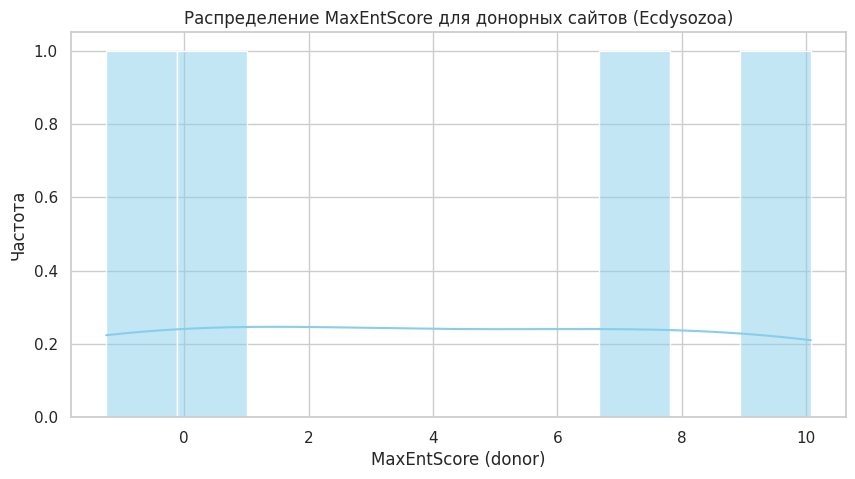

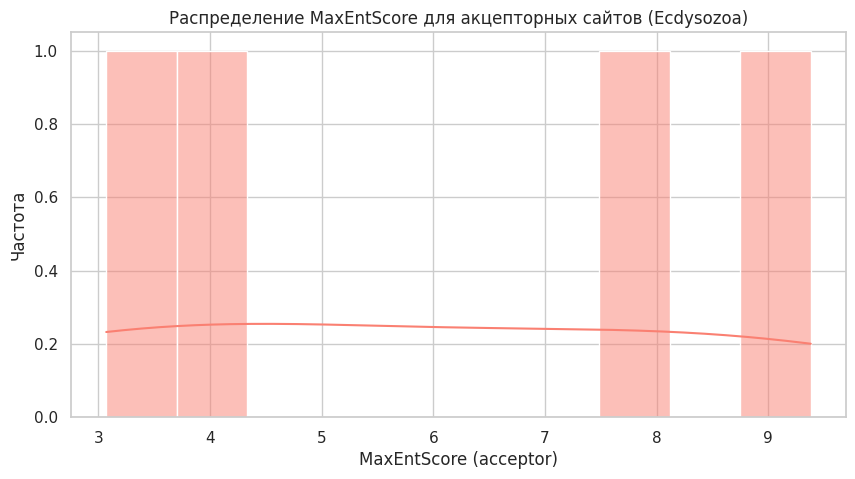

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки стиля
sns.set(style="whitegrid")

# Донорные сайты
plt.figure(figsize=(10, 5))
sns.histplot(df_ecdysozoa[df_ecdysozoa["site_type"] == "donor"]["maxentscore"],
             bins=10, kde=True, color="skyblue")
plt.title("Распределение MaxEntScore для донорных сайтов (Ecdysozoa)")
plt.xlabel("MaxEntScore (donor)")
plt.ylabel("Частота")
plt.show()

# Акцепторные сайты
plt.figure(figsize=(10, 5))
sns.histplot(df_ecdysozoa[df_ecdysozoa["site_type"] == "acceptor"]["maxentscore"],
             bins=10, kde=True, color="salmon")
plt.title("Распределение MaxEntScore для акцепторных сайтов (Ecdysozoa)")
plt.xlabel("MaxEntScore (acceptor)")
plt.ylabel("Частота")
plt.show()


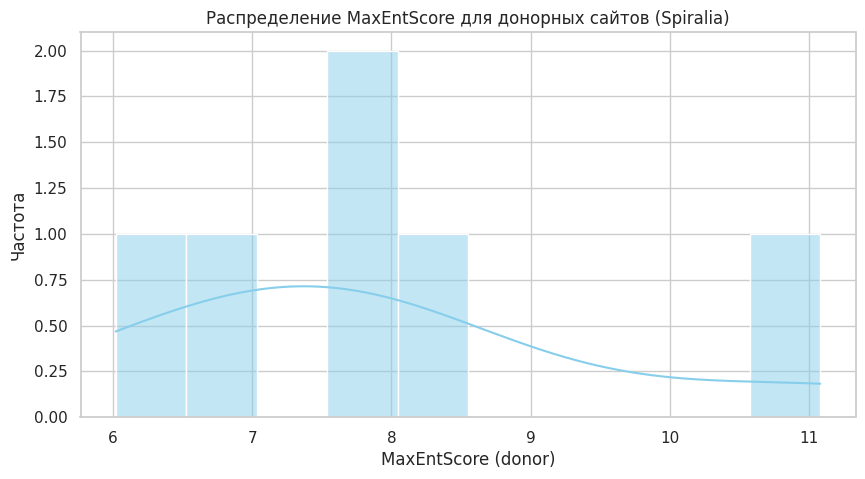

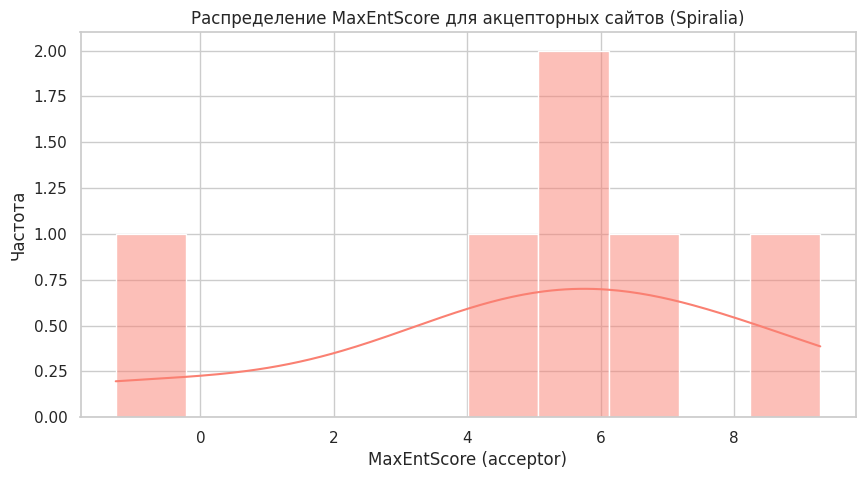

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки стиля
sns.set(style="whitegrid")

# Донорные сайты
plt.figure(figsize=(10, 5))
sns.histplot(df_spiralia[df_spiralia["site_type"] == "donor"]["maxentscore"],
             bins=10, kde=True, color="skyblue")
plt.title("Распределение MaxEntScore для донорных сайтов (Spiralia)")
plt.xlabel("MaxEntScore (donor)")
plt.ylabel("Частота")
plt.show()

# Акцепторные сайты
plt.figure(figsize=(10, 5))
sns.histplot(df_spiralia[df_spiralia["site_type"] == "acceptor"]["maxentscore"],
             bins=10, kde=True, color="salmon")
plt.title("Распределение MaxEntScore для акцепторных сайтов (Spiralia)")
plt.xlabel("MaxEntScore (acceptor)")
plt.ylabel("Частота")
plt.show()
